In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv
/kaggle/input/tps-06-22-tsne-dimensionality-reduction/__results__.html
/kaggle/input/tps-06-22-tsne-dimensionality-reduction/__notebook__.ipynb
/kaggle/input/tps-06-22-tsne-dimensionality-reduction/__output__.json
/kaggle/input/tps-06-22-tsne-dimensionality-reduction/reduced_datas.csv
/kaggle/input/tps-06-22-tsne-dimensionality-reduction/custom.css
/kaggle/input/tps-06-22-tsne-dimensionality-reduction/__results___files/__results___11_0.png
/kaggle/input/tps-06-22-tsne-dimensionality-reduction/__results___files/__results___9_1.png
/kaggle/input/tps-06-22-tsne-dimensionality-reduction/__results___files/__results___14_0.png


In [2]:
reduced_data_df = pd.read_csv('/kaggle/input/tps-06-22-tsne-dimensionality-reduction/reduced_datas.csv')
reduced_data_df.head()

data_df = pd.read_csv('/kaggle/input/tabular-playground-series-jul-2022/data.csv')

In [3]:
N_SAMPLE = 10000

from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

sample_df_2D = reduced_data_df.sample(N_SAMPLE,random_state = 42)
sample_df = data_df.sample(N_SAMPLE,random_state = 42)
# define dataset
X_2d = sample_df_2D.reset_index().drop(columns=["index"])
X = sample_df.reset_index().drop(columns=["index"])

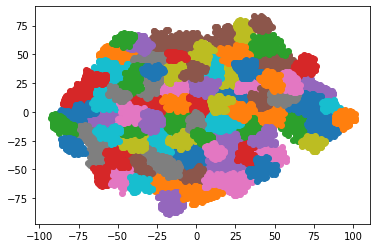

Number of clusters: 88


In [4]:
# 2D Agglomerative

# define the model
model = AgglomerativeClustering(n_clusters=None,  distance_threshold=100)
# fit model and predict clusters
yhat = model.fit_predict(X_2d)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X_2d.iloc[row_ix[0], 0], X_2d.iloc[row_ix[0], 1])
# show the plot
pyplot.show()
print(f"Number of clusters: {len(clusters)}")

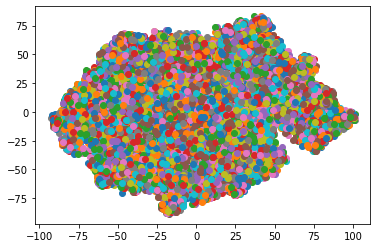

Number of clusters: 326


In [5]:
# Agglomerative CLustering

from sklearn.cluster import AgglomerativeClustering

# define dataset

# define the model
model = AgglomerativeClustering(n_clusters=None,  distance_threshold=1000)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X_2d.iloc[row_ix[0], 0], X_2d.iloc[row_ix[0], 1])
# show the plot
pyplot.show()
print(f"Number of clusters: {len(clusters)}")

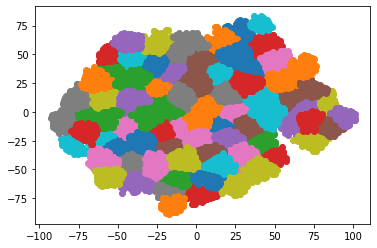

Number of clusters: 80


In [6]:
# 2D AffinityPropagation

from sklearn.cluster import AffinityPropagation

# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X_2d)

#
# assign a cluster to each example
yhat = model.predict(X_2d)
# retrieve unique clusters
clusters = np.unique(yhat)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X_2d.iloc[row_ix[0], 0], X_2d.iloc[row_ix[0], 1])
# show the plot
pyplot.show()
print(f"Number of clusters: {len(clusters)}")

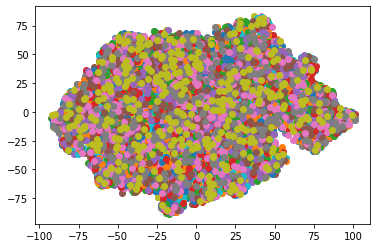

Number of clusters: 29


In [7]:
# AffinityPropagation

model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)

#
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X_2d.iloc[row_ix[0], 0], X_2d.iloc[row_ix[0], 1])
# show the plot
pyplot.show()
print(f"Number of clusters: {len(clusters)}")